<a href="https://colab.research.google.com/github/Anju982/data-science-portfolio/blob/main/Stock_predict_nuralprhophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Price Forecasting with NeuralProphet
Overview This project implements a time-series forecasting model to predict stock price movements. By utilizing NeuralProphet—a hybrid framework that combines traditional statistical modeling with deep learning—the project identifies complex market trends and seasonal patterns to provide data-driven insights.

Core Objectives * Trend Analysis: Extract long-term growth trajectories from historical pricing data.

Seasonality Detection: Identify recurring daily, weekly, and yearly cycles that influence stock volatility.

Predictive Modeling: Generate a 30-day future price horizon using an Auto-Regressive Feed-Forward Neural Network (AR-Net).

Technical Highlights * Hybrid Architecture: Merges the interpretability of Facebook’s Prophet with the high-performance forecasting of PyTorch.

Data Optimization: Preprocessed raw financial datasets into time-series formats, ensuring robust model ingestion.

Performance Tracking: Validated model accuracy through Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) to ensure reliable predictions.

Technologies Used * Language: Python

Libraries: NeuralProphet, Pandas, PyTorch, Matplotlib

Environment: Google Colab / Jupyter Notebook

In [1]:
!pip install neuralprophet

In [9]:
from neuralprophet import NeuralProphet
import yfinance as yf
import matplotlib.pyplot as plt

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [3]:
stock_symbol = "NVDA"  # Stock symbol
start_date = "2022-01-01"  # Start date
end_date = "2026-01-31"  # End date
forecast_days = 60  # Number of forecast days

In [4]:
#Downloading Data
data = yf.download(stock_symbol, start=start_date, end=end_date)

/tmp/ipython-input-2117590181.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [5]:
data.to_csv(stock_symbol+".csv")

In [6]:
#Descriptive Statistic
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,1023.000000,1023.000000,1023.000000,1023.000000,1.023000e+03
mean,81.285207,82.656815,79.789638,81.307271,3.990762e+08
std,59.703627,60.555943,58.826232,59.799888,1.862042e+08
min,11.212903,11.720264,10.799424,10.957226,6.552850e+07
25%,24.135609,24.570501,23.433572,23.935636,2.374168e+08
50%,56.350609,56.803356,54.869435,56.315628,3.934830e+08
75%,132.284241,134.968079,129.969447,132.738438,5.129825e+08
max,207.028473,212.178195,205.548551,208.068415,1.543911e+09


In [7]:
#Processing Dataframe
data = data.reset_index()
stocks=data[["Date","Close"]]
stocks.columns = ["ds","y"]

In [30]:
#Runing Model
import torch
import neuralprophet
import numpy # Import numpy

# Store original torch.load
_original_torch_load = torch.load

# Define a wrapper for torch.load that forces weights_only=False
def _wrapped_torch_load(*args, **kwargs):
    kwargs['weights_only'] = False
    return _original_torch_load(*args, **kwargs)

# Temporarily replace torch.load
torch.load = _wrapped_torch_load

model = NeuralProphet()
model.fit(stocks)

# Restore original torch.load after fitting (good practice)
torch.load = _original_torch_load

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.797% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 95.797% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one datafra

Finding best initial lr:   0%|          | 0/226 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [31]:
#Forcasing Future
future = model.make_future_dataframe(stocks,periods=forecast_days)

forecast = model.predict(future)
forecast['yhat1'] = forecast['yhat1'].clip(lower=0)
actual_prediction = model.predict(stocks)
actual_prediction['yhat1'] = actual_prediction['yhat1'].clip(lower=0)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.797% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 95.797% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Predicting: 32it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.797% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 95.797% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.in

Predicting: 32it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [32]:
print(forecast.columns)

Index(['ds', 'y', 'yhat1', 'trend', 'season_yearly', 'season_weekly'], dtype='object')


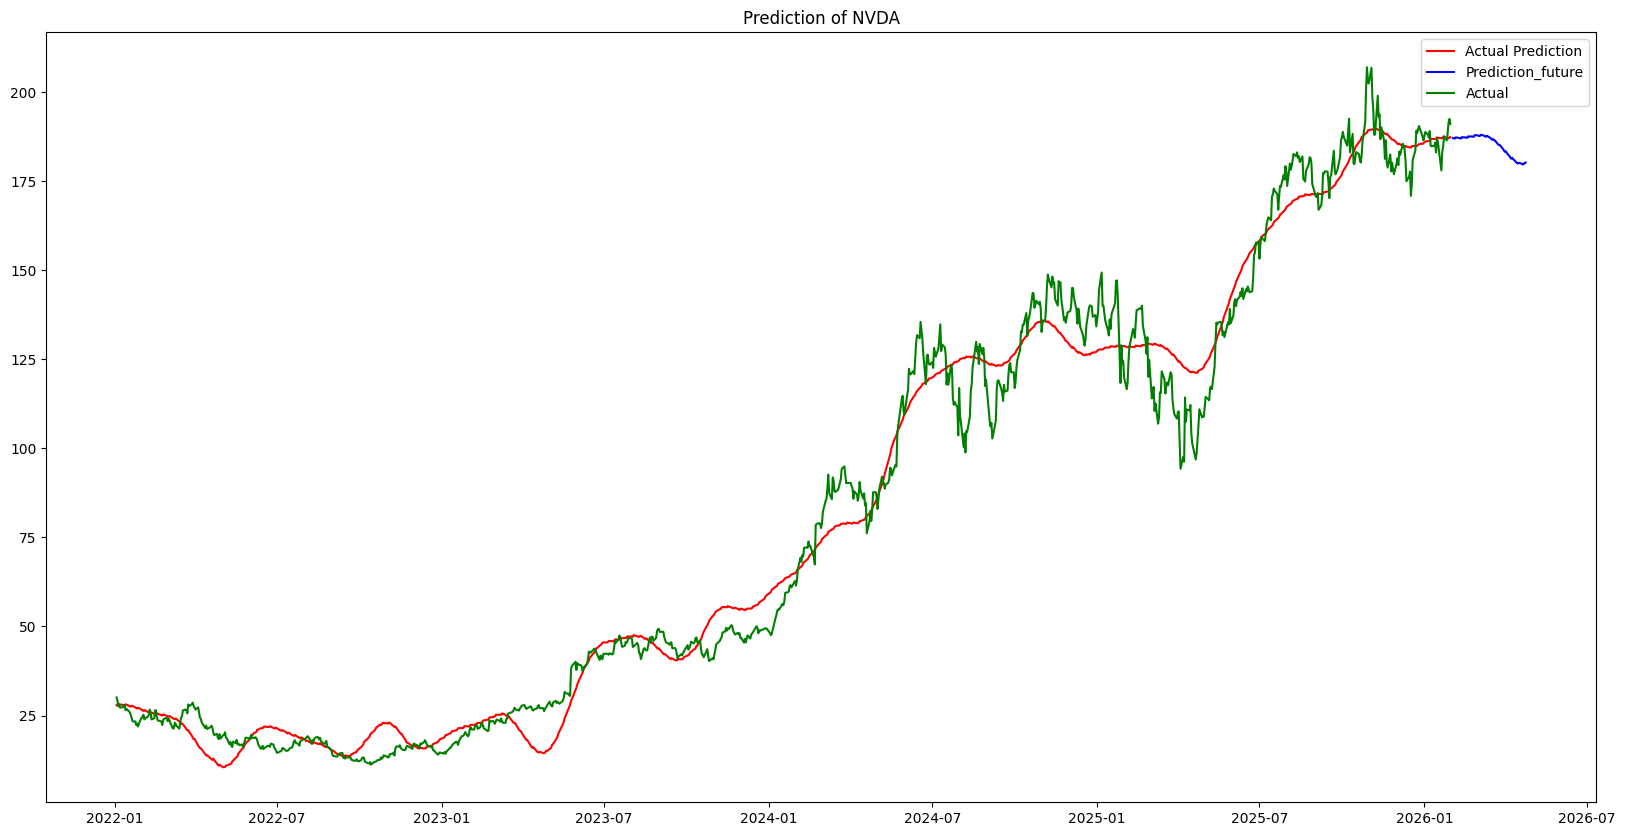

In [33]:
#Ploting Graphs

plt.figure(figsize=(20, 10))
plt.title("Prediction of "+stock_symbol)
plt.plot(actual_prediction["ds"], actual_prediction["yhat1"], label="Actual Prediction", c = 'red')
plt.plot(forecast["ds"], forecast["yhat1"], label="Prediction_future", c = 'blue')
plt.plot(stocks["ds"], stocks["y"], label="Actual", c = 'green')
plt.legend()

In [34]:
forecast.describe()

,ds,yhat1,trend,season_yearly,season_weekly
count,60,60.000000,60.000000,60.000000,60.000000
mean,2026-03-14 12:00:00,185.201340,168.347198,-10.591066,27.445189
min,2026-02-02 00:00:00,179.709915,161.849258,-22.118801,27.226940
25%,2026-02-22 06:00:00,182.721310,165.098225,-16.372135,27.294146
50%,2026-03-14 12:00:00,187.009628,168.347198,-8.482988,27.436231
75%,2026-04-03 18:00:00,187.534702,171.596191,-4.942361,27.586635
max,2026-04-24 00:00:00,188.069214,174.845169,-2.114010,27.744720
std,NaN,2.963680,3.916423,6.661945,0.146172
